<a href="https://colab.research.google.com/github/oavrex/text_classification/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D0%BF%D0%BE_%D1%82%D0%BE%D0%BF%D0%B8%D0%BA%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd


input = {
    'sentence': [
        'New Breakthrough in AI Technology',
        'Top Charting Album of the Year',
        'The Most Anticipated Movie of the Summer',
        'Exploring the Hidden Gems of Japan',
        'Revolutionary Advances in Quantum Computing',
        'Concert Tour Dates Announced for Famous Band',
        'Horror Movie Wins Top Awards at Film Festival',
        'Top 10 Must-Visit Destinations in Europe',
        'The Future of Blockchain and Cryptocurrency',
        'Pop Star Releases New Single with Stunning Music Video',
        'Critically Acclaimed Director Releases New Thriller',
        'Adventure Awaits: Hiking Through the Alps',
        'Cutting-Edge Innovations in Virtual Reality',
        'Classical Music Event Draws Thousands of Fans',
        'A Heartwarming Tale Wins Best Picture Award',
        'Experience the Rich Culture of India on Your Next Trip',
        'The Rise of 5G Technology Worldwide',
        'Newcomer Takes the Music Industry by Storm',
        'The Art of Cinematography: A Masterclass',
        'Discovering the Beauty of the Australian Outback'
    ],
    'topic': [
        'IT',
        'Music',
        'Movies',
        'Travel',
        'IT',
        'Music',
        'Movies',
        'Travel',
        'IT',
        'Music',
        'Movies',
        'Travel',
        'IT',
        'Music',
        'Movies',
        'Travel',
        'IT',
        'Music',
        'Movies',
        'Travel'
    ]
}

input_df = pd.DataFrame(input)

In [4]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.0 MB/s eta 0:00:00


In [26]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = input_df['sentence'].apply(lambda x: model.encode(x)).tolist()

In [27]:
from sklearn.model_selection import train_test_split

X = embeddings
y = input_df['topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model1 = LogisticRegression(max_iter=30)
model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
classification_report(y_test, prediction1, zero_division=1)

'              precision    recall  f1-score   support\n\n          IT       1.00      1.00      1.00         1\n      Movies       0.00      1.00      0.00         0\n       Music       1.00      0.00      0.00         2\n      Travel       1.00      1.00      1.00         1\n\n    accuracy                           0.50         4\n   macro avg       0.75      0.75      0.50         4\nweighted avg       1.00      0.50      0.50         4\n'

In [29]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, prediction1)
print(f"Cohen’s Kappa: {kappa}")

Cohen’s Kappa: 0.4285714285714286


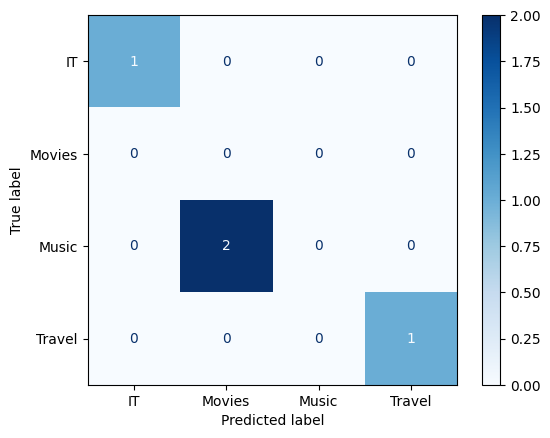

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap='Blues')

In [30]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)
classification_report(y_test, prediction2, zero_division=1)

'              precision    recall  f1-score   support\n\n          IT       1.00      1.00      1.00         1\n      Movies       0.00      1.00      0.00         0\n       Music       1.00      0.50      0.67         2\n      Travel       1.00      0.00      0.00         1\n\n    accuracy                           0.50         4\n   macro avg       0.75      0.62      0.42         4\nweighted avg       1.00      0.50      0.58         4\n'

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, prediction2)
print(f"Cohen’s Kappa: {kappa}")

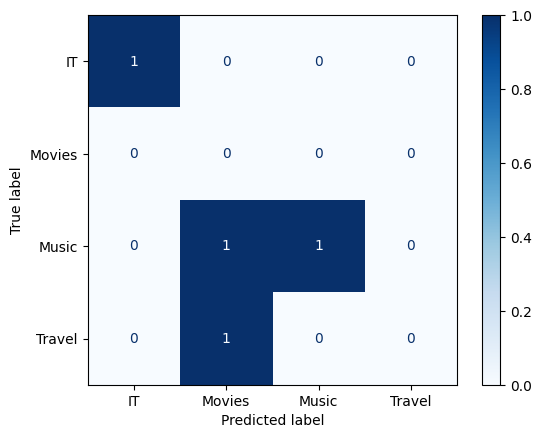

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap='Blues')

In [36]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', LogisticRegression(max_iter=100)),
    ('rf', RandomForestClassifier(n_estimators=100)),
]
model3 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model3.fit(X_train, y_train)

prediction3 = model3.predict(X_test)
classification_report(y_test, prediction3, zero_division=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


'              precision    recall  f1-score   support\n\n          IT       1.00      1.00      1.00         1\n      Movies       0.00      1.00      0.00         0\n       Music       1.00      0.00      0.00         2\n      Travel       1.00      0.00      0.00         1\n\n    accuracy                           0.25         4\n   macro avg       0.75      0.50      0.25         4\nweighted avg       1.00      0.25      0.25         4\n'

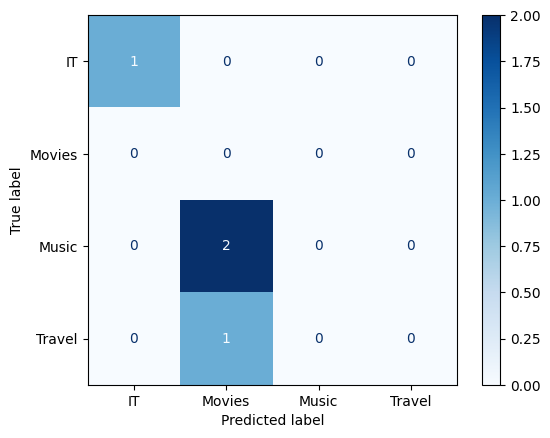

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='Blues')